## Make a program to choose randomly p fraction of the population to infect initially
* Randomly with choosen probability picks 0 and 1 
* We find list of all unique users and then we need to infect a percentage of population
* Again a problem here is that we need to start infecting users only after a particular time
* we need to make this set to be positive or negative

**I propose that there could be atleast two mechanism to start infection**
1. Randomly infect people by choosing them after a particular time
2. Randomly infect people by choosing a particular place at particular time (this is how COVID started)
3. If choosing step 2 then we can randmly infect people who were at that place at a particular time
4. Using alpha as infection rate

In [1]:
import pandas as pd
df = pd.read_csv("processedTMSC2014.tsv",sep='\t', engine="python")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

# EXTRA IDEAS
## We can use venue catorgories to define the probabilty of infection
* If it is a closed space we can have more probability 
* If it is public space which is frequented by many we can give more probability
* Also we can give probability of contamination by looking at how many people were there at the place at given time

In [2]:
df

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,0,0,0,0,1333476009
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,0,0,0,0,1333476025
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,0,0,0,0,1333476144
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,0,0,0,0,1333476161
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,0,0,0,0,1333476180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,0,0,0,0,1360981751
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,0,0,0,0,1360981895
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,0,0,0,0,1360981996
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,0,0,0,0,1360982071


# We set the randomly chosen population to be infected

In [3]:
import numpy as np

alpha = 0.1

#choosing unique users from list of all user IDs
unique_users =  pd.unique(df["User ID (anonymized)"])#.

print(f"Number of unique users are: {len(unique_users)}")

# this is when we are infecting people after a particular time
gen_positive = np.random.choice((1,0),size = len(unique_users), p=[alpha, 1-alpha])

#Choosing the time at which infection begins
infect_time = df.iloc[2000]["Time"]

infections = np.sum(gen_positive)
print(f"Number of infected users: {infections}")

Number of unique users are: 1083
Number of infected users: 113


In [4]:
print(gen_positive,len(gen_positive))
print(unique_users, len(unique_users))

[0 1 0 ... 0 0 0] 1083
[ 470  979   69 ...  911 1081  849] 1083


In [5]:
print(gen_positive,len(gen_positive))
print(unique_users, len(unique_users))

[0 0 0 ... 0 1 1] 1083
[ 470  979   69 ...  911 1081  849] 1083


In [6]:
#Query logic to select only those users whose user id and time matches or  those who are positive already
for i in range(len(unique_users)):
    #print(i)
    if gen_positive[i] == 1:
        #Below query gives sets status to 1 if infected userId and time condition matches
        df["Status"]= np.where( ( (df["User ID (anonymized)"] == unique_users[i]) & (df["Time"] >= infect_time) ) | (df["Status"] == 1),1,0)

# Setting infection time for all
df["InfectionTime"] = np.where(df["Status"]==1,infect_time,0)

# We set testing time to be 7 days after infection time
viral_day = 21

df["TestedTime"] = np.where(df["Status"]==1,infect_time + viral_day*24*60*60,0)

count_infected = len(df[df["Status"]==1])
print(f"number of infect rows: {count_infected}")

number of infect rows: 24256


In [7]:
df

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,0,0,0,0,1333476009,0
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,0,0,0,0,1333476025,0
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,0,0,0,0,1333476144,0
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,0,0,0,0,1333476161,0
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,0,0,0,0,1333476180,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,0,0,0,0,1360981751,0
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,0,0,0,0,1360981895,0
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,0,0,0,0,1360981996,0
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,0,0,0,0,1360982071,0


# We need to do following
* We need to find every person that has been infected
* for every person that has been infected we need to find the other person who was at same place and time range
* infect these people with certain probability

In [8]:
# Find all the infected rows
infected_users_dataframe = df[df["Status"]==1]
print("List of infected users")
infected_users_dataframe

List of infected users


,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime
2007,129,4e00b995d1647696f1211347,4bf58dd8d48988d1c5941735,Sandwich Place,40.750644,-73.976142,-240,Wed Apr 04 17:22:53 +0000 2012,1,0,0,1333559854,1333560173,1335374254
2009,826,4b4cca8bf964a52010bf26e3,4bf58dd8d48988d1dd931735,Soup Place,40.760165,-73.983080,-240,Wed Apr 04 17:23:27 +0000 2012,1,0,0,1333559854,1333560207,1335374254
2015,994,4ab3a2f4f964a520e56d20e3,4bf58dd8d48988d124941735,Office,40.702839,-73.989135,-240,Wed Apr 04 17:27:02 +0000 2012,1,0,0,1333559854,1333560422,1335374254
2027,826,4b4bc134f964a52093a626e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.760802,-73.983493,-240,Wed Apr 04 17:30:14 +0000 2012,1,0,0,1333559854,1333560614,1335374254
2045,806,4d0b9d235f86f04dafe8cca0,4bf58dd8d48988d1c5941735,Sandwich Place,40.749706,-73.983878,-240,Wed Apr 04 17:40:54 +0000 2012,1,0,0,1333559854,1333561254,1335374254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227364,719,4b39f942f964a520e95f25e3,4bf58dd8d48988d129951735,Train Station,40.939544,-74.121665,-300,Thu Feb 14 12:14:09 +0000 2013,1,0,0,1333559854,1360844049,1335374254
227364,719,4b39f942f964a520e95f25e3,4bf58dd8d48988d129951735,Train Station,40.939544,-74.121665,-300,Thu Feb 14 12:14:09 +0000 2013,1,0,0,1333559854,1360978522,1335374254
227388,185,4d3f3c07cb84b60ce1527bab,4bf58dd8d48988d10a951735,Bank,40.947823,-74.069842,-300,Sat Feb 16 01:50:51 +0000 2013,1,0,0,1333559854,1360979451,1335374254
227400,185,4c33727a66e40f478904c88b,4bf58dd8d48988d172941735,Post Office,40.948923,-74.069722,-300,Sat Feb 16 02:04:53 +0000 2013,1,0,0,1333559854,1360980293,1335374254


In [9]:
# Find all the infected users
infected_users_dataframe = df[df["Status"]==1]
infected_users = pd.unique(infected_users_dataframe["User ID (anonymized)"])
print("Infected Users are: ")
print(infected_users)
#count number of infections
infections = len(infected_users)
print(f"Total infections are: {infections}")
# Infection list stores list of infected people per round of simulation
infection_list = []
infection_list.append(infected_users)
# We need to find all the users who where at the same place as the infected user and in time range of 1 hrs
# 1hr = 3600 seconds
# ITERATING OVER ALL ROWS AND CHECKING TIME
iteration_count = 0
while(infections!=0):
    # we will maintain this variable to fetch only new infections
    print("#############################################################################")
    print("#############################################################################")
    print("#############################################################################")
    infected_rows = len(infected_users_dataframe)
    for i in range(infected_rows):
        print(f"Calculating for infected person: {i} of {infected_rows}")
        infector = infected_users_dataframe.iloc[i]
        
        ##print("Infector is:")
        ##print("###################################################################")
        ##print(infector)
        ##print("###################################################################")
        
        #Cured  or Dead person cannot effect
        if(infector["TestedTime"]< infector["Time"]): 
            print("This person has either been cured or dead... thence no effect!")
            continue
        
        
        # Finding all those prople infector meets after start of infection time
        # meeting_population =  list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"])  & (df["Time"] >= infect_time))[0])
        
        # Finding all people that infector meets at infectors time range
        # Meeting Population is the list of indices of the people, not the User Id (anonymized)
        # We are keeping 3 hours time window -1 +2
        
        meeting_population =  list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"]) & ( (df["Time"] >= (infector["Time"]-3600)) & (df["Time"] <= (infector["Time"]+7200)) ))[0])
        
        print("List of people this infector meets: "+str({len(meeting_population)})) 
        ##print(meeting_population)
        ##print(meeting_population)
        
        for index in meeting_population:
            person = df.iloc[index]
            if(person["Status"]==0):
                
                print(f"Non infected person met.................{index}")
                ##print("In range.............................")
                #Find all the entries of this person after this time and set details
                
                person_rows = np.where( (df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0]
                
                ##print("Places where this person has rows")
                ##print(f"Rows of person is : {len(person_rows)}")
                
                # TO MAKE MORE EFFIECIENT
                # https://stackoverflow.com/questions/49447233/python-maintain-multiple-columns-with-np-where
                for k in range(len(person_rows)):
                    df.at[index, "Status"] = 1
                    #print("Status Set")
                    df.at[index, "InfectorId"] = infector["User ID (anonymized)"]
                    #print("Infector Id Set")
                    df.at[index, "InfectionTime"] = person["Time"]
                    #print("Infection Time Set")
                    df.at[index, "Iteration"] = iteration_count+1
                    #print(df.iloc[index])
                    #print(df)
                    df.at[index, "InfectionLongitude"] = infector["Longitude"]
                    df.at[index, "InfectionLatitude"] = infector["Latitude"]
            else:
                # AS data is sorted with time we assume that we don't need tp bother who infects first
                print(f"Met with an already infected person.................{index}")
                
    # Find all the infected users
    # HERE WE MUST ALSO SET CONDITIONS BASED ON ITERATION, FETCH ONLY THAT WERE INFECTED IN THIS ITERATION
    iteration_count += 1
    print(f"Finding new Infections............................Iteration {iteration_count}")
    infected_users_dataframe = df[(df["Status"]==1) & (df["Iteration"]==iteration_count)]
    infected_users = pd.unique(infected_users_dataframe["User ID (anonymized)"])
    infection_list.append(infected_users)
    ##print("Infected Users are: ")
    ##print(infected_users)
    #count number of infections
    print("Infected Users are: ")
    print(infected_users)
    infections = len(infected_users)
    print(f"Total new infections are: {infections}") 
    print("#############################################################################")
    print("#############################################################################")
    print("#############################################################################")

df

Infected Users are: 
[ 129  826  994  806 1049   52  604 1027  185  722  474  272   46  371
  839  702 1060  951  543  328  144  164  483  202  357  171   15  353
  868  536  340  949  804   51  561  119  288  267  162  208   43  833
  657   63  663  643  296  388  684    3  707  884  364  642  818  130
  423  607  345   39  330  716  897  131  837  594  975  861  410  974
 1072  904   80  672   18  756  218  694  661  393  351  556    8  938
  326  719 1017  143  567  748  219  954   11 1061  934  476  898  137
  555  860  197  479  960  862  223  451  743  914 1022 1035  477 1081
  849]
Total infections are: 113
#############################################################################
#############################################################################
#############################################################################
Calculating for infected person: 0 of 24256
List of people this infector meets: {1}
Met with an already infected person.................2007
Cal

List of people this infector meets: {1}
Met with an already infected person.................2589
Calculating for infected person: 55 of 24256
List of people this infector meets: {1}
Met with an already infected person.................2606
Calculating for infected person: 56 of 24256
List of people this infector meets: {1}
Met with an already infected person.................2610
Calculating for infected person: 57 of 24256
List of people this infector meets: {1}
Met with an already infected person.................2613
Calculating for infected person: 58 of 24256
List of people this infector meets: {1}
Met with an already infected person.................2622
Calculating for infected person: 59 of 24256
List of people this infector meets: {1}
Met with an already infected person.................2643
Calculating for infected person: 60 of 24256
List of people this infector meets: {1}
Met with an already infected person.................2667
Calculating for infected person: 61 of 24256
List o

List of people this infector meets: {1}
Met with an already infected person.................3347
Calculating for infected person: 113 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3351
Calculating for infected person: 114 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3358
Calculating for infected person: 115 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3372
Calculating for infected person: 116 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3396
Calculating for infected person: 117 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3406
Calculating for infected person: 118 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3409
Calculating for infected person: 119 of 24256

Calculating for infected person: 163 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3806
Calculating for infected person: 164 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3807
Calculating for infected person: 165 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3816
Calculating for infected person: 166 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3818
Calculating for infected person: 167 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3834
Calculating for infected person: 168 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3841
Calculating for infected person: 169 of 24256
List of people this infector meets: {1}
Met with an already infected person.................3852

List of people this infector meets: {1}
Met with an already infected person.................4525
Calculating for infected person: 233 of 24256
List of people this infector meets: {1}
Met with an already infected person.................4526
Calculating for infected person: 234 of 24256
List of people this infector meets: {1}
Met with an already infected person.................4534
Calculating for infected person: 235 of 24256
List of people this infector meets: {1}
Met with an already infected person.................4540
Calculating for infected person: 236 of 24256
List of people this infector meets: {1}
Met with an already infected person.................4547
Calculating for infected person: 237 of 24256
List of people this infector meets: {2}
Met with an already infected person.................4569
Met with an already infected person.................4571
Calculating for infected person: 238 of 24256
List of people this infector meets: {2}
Met with an already infected person..........

Met with an already infected person.................5165
Met with an already infected person.................5168
Met with an already infected person.................5169
Met with an already infected person.................5170
Non infected person met.................5175
Non infected person met.................5190
Non infected person met.................5248
Non infected person met.................5250
Non infected person met.................5267
Non infected person met.................5286
Calculating for infected person: 297 of 24256
List of people this infector meets: {11}
Met with an already infected person.................5130
Met with an already infected person.................5165
Met with an already infected person.................5168
Met with an already infected person.................5169
Met with an already infected person.................5170
Met with an already infected person.................5175
Met with an already infected person.................5190
Met with an alre

Non infected person met.................5525
Non infected person met.................5526
Non infected person met.................5558
Non infected person met.................5569
Met with an already infected person.................5571
Non infected person met.................5598
Calculating for infected person: 326 of 24256
List of people this infector meets: {1}
Met with an already infected person.................5398
Calculating for infected person: 327 of 24256
List of people this infector meets: {1}
Met with an already infected person.................5405
Calculating for infected person: 328 of 24256
List of people this infector meets: {4}
Met with an already infected person.................5413
Non infected person met.................5419
Met with an already infected person.................5423
Met with an already infected person.................5491
Calculating for infected person: 329 of 24256
List of people this infector meets: {4}
Met with an already infected person.........

Calculating for infected person: 365 of 24256
List of people this infector meets: {1}
Met with an already infected person.................5748
Calculating for infected person: 366 of 24256
List of people this infector meets: {1}
Met with an already infected person.................5773
Calculating for infected person: 367 of 24256
List of people this infector meets: {1}
Met with an already infected person.................5777
Calculating for infected person: 368 of 24256
List of people this infector meets: {1}
Met with an already infected person.................5785
Calculating for infected person: 369 of 24256
List of people this infector meets: {1}
Met with an already infected person.................5792
Calculating for infected person: 370 of 24256
List of people this infector meets: {12}
Met with an already infected person.................5806
Met with an already infected person.................5830
Met with an already infected person.................5835
Met with an already infecte

Calculating for infected person: 427 of 24256
List of people this infector meets: {1}
Met with an already infected person.................6701
Calculating for infected person: 428 of 24256
List of people this infector meets: {1}
Met with an already infected person.................6711
Calculating for infected person: 429 of 24256
List of people this infector meets: {1}
Met with an already infected person.................6725
Calculating for infected person: 430 of 24256
List of people this infector meets: {1}
Met with an already infected person.................6729
Calculating for infected person: 431 of 24256
List of people this infector meets: {1}
Met with an already infected person.................6739
Calculating for infected person: 432 of 24256
List of people this infector meets: {1}
Met with an already infected person.................6753
Calculating for infected person: 433 of 24256
List of people this infector meets: {1}
Met with an already infected person.................6765

List of people this infector meets: {1}
Met with an already infected person.................7519
Calculating for infected person: 515 of 24256
List of people this infector meets: {2}
Met with an already infected person.................7521
Non infected person met.................7639
Calculating for infected person: 516 of 24256
List of people this infector meets: {1}
Met with an already infected person.................7530
Calculating for infected person: 517 of 24256
List of people this infector meets: {1}
Met with an already infected person.................7548
Calculating for infected person: 518 of 24256
List of people this infector meets: {1}
Met with an already infected person.................7560
Calculating for infected person: 519 of 24256
List of people this infector meets: {1}
Met with an already infected person.................7563
Calculating for infected person: 520 of 24256
List of people this infector meets: {1}
Met with an already infected person.................7578


List of people this infector meets: {1}
Met with an already infected person.................8608
Calculating for infected person: 607 of 24256
List of people this infector meets: {1}
Met with an already infected person.................8620
Calculating for infected person: 608 of 24256
List of people this infector meets: {1}
Met with an already infected person.................8621
Calculating for infected person: 609 of 24256
List of people this infector meets: {1}
Met with an already infected person.................8622
Calculating for infected person: 610 of 24256
List of people this infector meets: {1}
Met with an already infected person.................8626
Calculating for infected person: 611 of 24256
List of people this infector meets: {1}
Met with an already infected person.................8628
Calculating for infected person: 612 of 24256
List of people this infector meets: {1}
Met with an already infected person.................8630
Calculating for infected person: 613 of 24256

List of people this infector meets: {1}
Met with an already infected person.................8994
Calculating for infected person: 661 of 24256
List of people this infector meets: {1}
Met with an already infected person.................8996
Calculating for infected person: 662 of 24256
List of people this infector meets: {1}
Met with an already infected person.................8998
Calculating for infected person: 663 of 24256
List of people this infector meets: {1}
Met with an already infected person.................9002
Calculating for infected person: 664 of 24256
List of people this infector meets: {1}
Met with an already infected person.................9006
Calculating for infected person: 665 of 24256
List of people this infector meets: {1}
Met with an already infected person.................9008
Calculating for infected person: 666 of 24256
List of people this infector meets: {1}
Met with an already infected person.................9015
Calculating for infected person: 667 of 24256

List of people this infector meets: {1}
Met with an already infected person.................10163
Calculating for infected person: 761 of 24256
List of people this infector meets: {1}
Met with an already infected person.................10164
Calculating for infected person: 762 of 24256
List of people this infector meets: {1}
Met with an already infected person.................10165
Calculating for infected person: 763 of 24256
List of people this infector meets: {1}
Met with an already infected person.................10177
Calculating for infected person: 764 of 24256
List of people this infector meets: {1}
Met with an already infected person.................10185
Calculating for infected person: 765 of 24256
List of people this infector meets: {1}
Met with an already infected person.................10189
Calculating for infected person: 766 of 24256
List of people this infector meets: {1}
Met with an already infected person.................10198
Calculating for infected person: 767 o

List of people this infector meets: {1}
Met with an already infected person.................10916
Calculating for infected person: 842 of 24256
List of people this infector meets: {1}
Met with an already infected person.................10934
Calculating for infected person: 843 of 24256
List of people this infector meets: {1}
Met with an already infected person.................10944
Calculating for infected person: 844 of 24256
List of people this infector meets: {1}
Met with an already infected person.................10990
Calculating for infected person: 845 of 24256
List of people this infector meets: {1}
Met with an already infected person.................10998
Calculating for infected person: 846 of 24256
List of people this infector meets: {1}
Met with an already infected person.................11026
Calculating for infected person: 847 of 24256
List of people this infector meets: {1}
Met with an already infected person.................11031
Calculating for infected person: 848 o

List of people this infector meets: {1}
Met with an already infected person.................11702
Calculating for infected person: 917 of 24256
List of people this infector meets: {1}
Met with an already infected person.................11704
Calculating for infected person: 918 of 24256
List of people this infector meets: {1}
Met with an already infected person.................11713
Calculating for infected person: 919 of 24256
List of people this infector meets: {1}
Met with an already infected person.................11743
Calculating for infected person: 920 of 24256
List of people this infector meets: {1}
Met with an already infected person.................11756
Calculating for infected person: 921 of 24256
List of people this infector meets: {1}
Met with an already infected person.................11787
Calculating for infected person: 922 of 24256
List of people this infector meets: {1}
Met with an already infected person.................11797
Calculating for infected person: 923 o

Calculating for infected person: 985 of 24256
List of people this infector meets: {1}
Met with an already infected person.................12439
Calculating for infected person: 986 of 24256
List of people this infector meets: {2}
Met with an already infected person.................12473
Non infected person met.................12608
Calculating for infected person: 987 of 24256
List of people this infector meets: {1}
Met with an already infected person.................12474
Calculating for infected person: 988 of 24256
List of people this infector meets: {1}
Met with an already infected person.................12493
Calculating for infected person: 989 of 24256
List of people this infector meets: {1}
Met with an already infected person.................12504
Calculating for infected person: 990 of 24256
List of people this infector meets: {1}
Met with an already infected person.................12505
Calculating for infected person: 991 of 24256
List of people this infector meets: {1}
Met 

Met with an already infected person.................13002
Non infected person met.................13046
Calculating for infected person: 1042 of 24256
List of people this infector meets: {1}
Met with an already infected person.................13006
Calculating for infected person: 1043 of 24256
List of people this infector meets: {1}
Met with an already infected person.................13013
Calculating for infected person: 1044 of 24256
List of people this infector meets: {1}
Met with an already infected person.................13017
Calculating for infected person: 1045 of 24256
List of people this infector meets: {1}
Met with an already infected person.................13021
Calculating for infected person: 1046 of 24256
List of people this infector meets: {2}
Met with an already infected person.................13026
Met with an already infected person.................13027
Calculating for infected person: 1047 of 24256
List of people this infector meets: {2}
Met with an already infect

Calculating for infected person: 1102 of 24256
List of people this infector meets: {1}
Met with an already infected person.................13454
Calculating for infected person: 1103 of 24256
List of people this infector meets: {1}
Met with an already infected person.................13455
Calculating for infected person: 1104 of 24256
List of people this infector meets: {1}
Met with an already infected person.................13471
Calculating for infected person: 1105 of 24256
List of people this infector meets: {1}
Met with an already infected person.................13480
Calculating for infected person: 1106 of 24256
List of people this infector meets: {1}
Met with an already infected person.................13487
Calculating for infected person: 1107 of 24256
List of people this infector meets: {1}
Met with an already infected person.................13488
Calculating for infected person: 1108 of 24256
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................14187
Calculating for infected person: 1171 of 24256
List of people this infector meets: {1}
Met with an already infected person.................14190
Calculating for infected person: 1172 of 24256
List of people this infector meets: {1}
Met with an already infected person.................14195
Calculating for infected person: 1173 of 24256
List of people this infector meets: {1}
Met with an already infected person.................14201
Calculating for infected person: 1174 of 24256
List of people this infector meets: {1}
Met with an already infected person.................14215
Calculating for infected person: 1175 of 24256
List of people this infector meets: {1}
Met with an already infected person.................14229
Calculating for infected person: 1176 of 24256
List of people this infector meets: {1}
Met with an already infected person.................14257
Calculating for infected person:

List of people this infector meets: {4}
Met with an already infected person.................14838
Non infected person met.................14882
Non infected person met.................14975
Non infected person met.................15035
Calculating for infected person: 1240 of 24256
List of people this infector meets: {1}
Met with an already infected person.................14842
Calculating for infected person: 1241 of 24256
List of people this infector meets: {1}
Met with an already infected person.................14848
Calculating for infected person: 1242 of 24256
List of people this infector meets: {1}
Met with an already infected person.................14859
Calculating for infected person: 1243 of 24256
List of people this infector meets: {2}
Met with an already infected person.................14872
Met with an already infected person.................14874
Calculating for infected person: 1244 of 24256
List of people this infector meets: {2}
Met with an already infected person....

List of people this infector meets: {1}
Met with an already infected person.................15432
Calculating for infected person: 1295 of 24256
List of people this infector meets: {1}
Met with an already infected person.................15448
Calculating for infected person: 1296 of 24256
List of people this infector meets: {1}
Met with an already infected person.................15467
Calculating for infected person: 1297 of 24256
List of people this infector meets: {1}
Met with an already infected person.................15473
Calculating for infected person: 1298 of 24256
List of people this infector meets: {1}
Met with an already infected person.................15476
Calculating for infected person: 1299 of 24256
List of people this infector meets: {1}
Met with an already infected person.................15490
Calculating for infected person: 1300 of 24256
List of people this infector meets: {3}
Non infected person met.................15472
Non infected person met.................1549

Non infected person met.................16299
Calculating for infected person: 1368 of 24256
List of people this infector meets: {2}
Met with an already infected person.................16234
Met with an already infected person.................16239
Calculating for infected person: 1369 of 24256
List of people this infector meets: {1}
Met with an already infected person.................16237
Calculating for infected person: 1370 of 24256
List of people this infector meets: {2}
Met with an already infected person.................16234
Met with an already infected person.................16239
Calculating for infected person: 1371 of 24256
List of people this infector meets: {1}
Met with an already infected person.................16242
Calculating for infected person: 1372 of 24256
List of people this infector meets: {1}
Met with an already infected person.................16247
Calculating for infected person: 1373 of 24256
List of people this infector meets: {1}
Met with an already infect

List of people this infector meets: {1}
Met with an already infected person.................16806
Calculating for infected person: 1423 of 24256
List of people this infector meets: {1}
Met with an already infected person.................16834
Calculating for infected person: 1424 of 24256
List of people this infector meets: {1}
Met with an already infected person.................16847
Calculating for infected person: 1425 of 24256
List of people this infector meets: {1}
Met with an already infected person.................16885
Calculating for infected person: 1426 of 24256
List of people this infector meets: {1}
Met with an already infected person.................16906
Calculating for infected person: 1427 of 24256
List of people this infector meets: {1}
Met with an already infected person.................16913
Calculating for infected person: 1428 of 24256
List of people this infector meets: {1}
Met with an already infected person.................16924
Calculating for infected person:

Calculating for infected person: 1503 of 24256
List of people this infector meets: {1}
Met with an already infected person.................17637
Calculating for infected person: 1504 of 24256
List of people this infector meets: {1}
Met with an already infected person.................17642
Calculating for infected person: 1505 of 24256
List of people this infector meets: {1}
Met with an already infected person.................17651
Calculating for infected person: 1506 of 24256
List of people this infector meets: {1}
Met with an already infected person.................17658
Calculating for infected person: 1507 of 24256
List of people this infector meets: {1}
Met with an already infected person.................17660
Calculating for infected person: 1508 of 24256
List of people this infector meets: {1}
Met with an already infected person.................17679
Calculating for infected person: 1509 of 24256
List of people this infector meets: {1}
Met with an already infected person........

Non infected person met.................18245
Calculating for infected person: 1562 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18114
Calculating for infected person: 1563 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18122
Calculating for infected person: 1564 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18124
Calculating for infected person: 1565 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18131
Calculating for infected person: 1566 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18141
Calculating for infected person: 1567 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18154
Calculating for infected person: 1568 of 24256
List of people this infector meets: {

Non infected person met.................19085
Calculating for infected person: 1621 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18806
Calculating for infected person: 1622 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18825
Calculating for infected person: 1623 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18847
Calculating for infected person: 1624 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18855
Calculating for infected person: 1625 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18863
Calculating for infected person: 1626 of 24256
List of people this infector meets: {1}
Met with an already infected person.................18864
Calculating for infected person: 1627 of 24256
List of people this infector meets: {

List of people this infector meets: {1}
Met with an already infected person.................19635
Calculating for infected person: 1683 of 24256
List of people this infector meets: {1}
Met with an already infected person.................19636
Calculating for infected person: 1684 of 24256
List of people this infector meets: {1}
Met with an already infected person.................19672
Calculating for infected person: 1685 of 24256
List of people this infector meets: {1}
Met with an already infected person.................19720
Calculating for infected person: 1686 of 24256
List of people this infector meets: {1}
Met with an already infected person.................19721
Calculating for infected person: 1687 of 24256
List of people this infector meets: {1}
Met with an already infected person.................19722
Calculating for infected person: 1688 of 24256
List of people this infector meets: {1}
Met with an already infected person.................19752
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................20498
Calculating for infected person: 1767 of 24256
List of people this infector meets: {1}
Met with an already infected person.................20517
Calculating for infected person: 1768 of 24256
List of people this infector meets: {1}
Met with an already infected person.................20528
Calculating for infected person: 1769 of 24256
List of people this infector meets: {1}
Met with an already infected person.................20533
Calculating for infected person: 1770 of 24256
List of people this infector meets: {1}
Met with an already infected person.................20536
Calculating for infected person: 1771 of 24256
List of people this infector meets: {1}
Met with an already infected person.................20542
Calculating for infected person: 1772 of 24256
List of people this infector meets: {1}
Met with an already infected person.................20543
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................21417
Calculating for infected person: 1855 of 24256
List of people this infector meets: {1}
Met with an already infected person.................21425
Calculating for infected person: 1856 of 24256
List of people this infector meets: {1}
Met with an already infected person.................21430
Calculating for infected person: 1857 of 24256
List of people this infector meets: {1}
Met with an already infected person.................21446
Calculating for infected person: 1858 of 24256
List of people this infector meets: {1}
Met with an already infected person.................21447
Calculating for infected person: 1859 of 24256
List of people this infector meets: {1}
Met with an already infected person.................21448
Calculating for infected person: 1860 of 24256
List of people this infector meets: {1}
Met with an already infected person.................21452
Calculating for infected person:

Calculating for infected person: 1944 of 24256
List of people this infector meets: {3}
Met with an already infected person.................22090
Met with an already infected person.................22092
Met with an already infected person.................22097
Calculating for infected person: 1945 of 24256
List of people this infector meets: {1}
Met with an already infected person.................22094
Calculating for infected person: 1946 of 24256
List of people this infector meets: {1}
Met with an already infected person.................22107
Calculating for infected person: 1947 of 24256
List of people this infector meets: {1}
Met with an already infected person.................22109
Calculating for infected person: 1948 of 24256
List of people this infector meets: {1}
Met with an already infected person.................22110
Calculating for infected person: 1949 of 24256
List of people this infector meets: {1}
Met with an already infected person.................22123
Calculating fo

List of people this infector meets: {1}
Met with an already infected person.................22917
Calculating for infected person: 2019 of 24256
List of people this infector meets: {1}
Met with an already infected person.................22929
Calculating for infected person: 2020 of 24256
List of people this infector meets: {1}
Met with an already infected person.................22962
Calculating for infected person: 2021 of 24256
List of people this infector meets: {2}
Met with an already infected person.................22976
Met with an already infected person.................23116
Calculating for infected person: 2022 of 24256
List of people this infector meets: {1}
Met with an already infected person.................22992
Calculating for infected person: 2023 of 24256
List of people this infector meets: {1}
Met with an already infected person.................23034
Calculating for infected person: 2024 of 24256
List of people this infector meets: {1}
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................23841
Calculating for infected person: 2106 of 24256
List of people this infector meets: {1}
Met with an already infected person.................23843
Calculating for infected person: 2107 of 24256
List of people this infector meets: {1}
Met with an already infected person.................23852
Calculating for infected person: 2108 of 24256
List of people this infector meets: {1}
Met with an already infected person.................23853
Calculating for infected person: 2109 of 24256
List of people this infector meets: {1}
Met with an already infected person.................23858
Calculating for infected person: 2110 of 24256
List of people this infector meets: {1}
Met with an already infected person.................23862
Calculating for infected person: 2111 of 24256
List of people this infector meets: {1}
Met with an already infected person.................23870
Calculating for infected person:

Met with an already infected person.................24865
Calculating for infected person: 2187 of 24256
List of people this infector meets: {1}
Met with an already infected person.................24868
Calculating for infected person: 2188 of 24256
List of people this infector meets: {1}
Met with an already infected person.................24890
Calculating for infected person: 2189 of 24256
List of people this infector meets: {1}
Met with an already infected person.................24892
Calculating for infected person: 2190 of 24256
List of people this infector meets: {1}
Met with an already infected person.................24912
Calculating for infected person: 2191 of 24256
List of people this infector meets: {1}
Met with an already infected person.................24914
Calculating for infected person: 2192 of 24256
List of people this infector meets: {2}
Met with an already infected person.................24917
Non infected person met.................24984
Calculating for infected p

Met with an already infected person.................25577
Calculating for infected person: 2247 of 24256
List of people this infector meets: {3}
Non infected person met.................25504
Non infected person met.................25521
Met with an already infected person.................25584
Calculating for infected person: 2248 of 24256
List of people this infector meets: {1}
Met with an already infected person.................25599
Calculating for infected person: 2249 of 24256
List of people this infector meets: {1}
Met with an already infected person.................25648
Calculating for infected person: 2250 of 24256
List of people this infector meets: {1}
Met with an already infected person.................25665
Calculating for infected person: 2251 of 24256
List of people this infector meets: {1}
Met with an already infected person.................25674
Calculating for infected person: 2252 of 24256
List of people this infector meets: {1}
Met with an already infected person...

Met with an already infected person.................26567
Met with an already infected person.................26573
Non infected person met.................26732
Non infected person met.................26737
Calculating for infected person: 2326 of 24256
List of people this infector meets: {4}
Met with an already infected person.................26567
Met with an already infected person.................26573
Met with an already infected person.................26732
Met with an already infected person.................26737
Calculating for infected person: 2327 of 24256
List of people this infector meets: {1}
Met with an already infected person.................26575
Calculating for infected person: 2328 of 24256
List of people this infector meets: {1}
Met with an already infected person.................26585
Calculating for infected person: 2329 of 24256
List of people this infector meets: {2}
Non infected person met.................26498
Met with an already infected person...............

Non infected person met.................27410
Met with an already infected person.................27425
Non infected person met.................27449
Non infected person met.................27489
Non infected person met.................27499
Non infected person met.................27502
Non infected person met.................27522
Non infected person met.................27609
Calculating for infected person: 2412 of 24256
List of people this infector meets: {1}
Met with an already infected person.................27438
Calculating for infected person: 2413 of 24256
List of people this infector meets: {1}
Met with an already infected person.................27472
Calculating for infected person: 2414 of 24256
List of people this infector meets: {2}
Non infected person met.................27400
Met with an already infected person.................27505
Calculating for infected person: 2415 of 24256
List of people this infector meets: {1}
Met with an already infected person.................

List of people this infector meets: {1}
Met with an already infected person.................28085
Calculating for infected person: 2483 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28086
Calculating for infected person: 2484 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28087
Calculating for infected person: 2485 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28096
Calculating for infected person: 2486 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28100
Calculating for infected person: 2487 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28102
Calculating for infected person: 2488 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28112
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................28636
Calculating for infected person: 2547 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28668
Calculating for infected person: 2548 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28670
Calculating for infected person: 2549 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28680
Calculating for infected person: 2550 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28689
Calculating for infected person: 2551 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28690
Calculating for infected person: 2552 of 24256
List of people this infector meets: {1}
Met with an already infected person.................28696
Calculating for infected person:

Calculating for infected person: 2482 of 20798
List of people this infector meets: {1}
Met with an already infected person.................29444
Calculating for infected person: 2631 of 24256
List of people this infector meets: {1}
Met with an already infected person.................29470
Calculating for infected person: 2632 of 24256
List of people this infector meets: {1}
Met with an already infected person.................29480
Calculating for infected person: 2633 of 24256
List of people this infector meets: {1}
Met with an already infected person.................29483
Calculating for infected person: 2634 of 24256
List of people this infector meets: {1}
Met with an already infected person.................29521
Calculating for infected person: 2635 of 24256
List of people this infector meets: {1}
Met with an already infected person.................29559
Calculating for infected person: 2636 of 24256
List of people this infector meets: {1}
Met with an already infected person........

Non infected person met.................30366
Calculating for infected person: 2702 of 24256
List of people this infector meets: {1}
Met with an already infected person.................30295
Calculating for infected person: 2703 of 24256
List of people this infector meets: {1}
Met with an already infected person.................30296
Calculating for infected person: 2704 of 24256
List of people this infector meets: {1}
Met with an already infected person.................30298
Calculating for infected person: 2705 of 24256
List of people this infector meets: {2}
Met with an already infected person.................30300
Non infected person met.................30325
Calculating for infected person: 2706 of 24256
List of people this infector meets: {1}
Met with an already infected person.................30303
Calculating for infected person: 2707 of 24256
List of people this infector meets: {1}
Met with an already infected person.................30307
Calculating for infected person: 2708 

List of people this infector meets: {9}
Met with an already infected person.................30752
Met with an already infected person.................30813
Met with an already infected person.................30814
Met with an already infected person.................30827
Met with an already infected person.................30832
Met with an already infected person.................30856
Met with an already infected person.................30897
Met with an already infected person.................30913
Non infected person met.................30940
Calculating for infected person: 2754 of 24256
List of people this infector meets: {1}
Met with an already infected person.................30836
Calculating for infected person: 2755 of 24256
List of people this infector meets: {1}
Met with an already infected person.................30838
Calculating for infected person: 2756 of 24256
List of people this infector meets: {1}
Met with an already infected person.................30844
Calculating for

Calculating for infected person: 2810 of 24256
List of people this infector meets: {8}
Met with an already infected person.................31461
Non infected person met.................31493
Non infected person met.................31494
Met with an already infected person.................31497
Met with an already infected person.................31498
Met with an already infected person.................31499
Non infected person met.................31535
Non infected person met.................31564
Calculating for infected person: 2811 of 24256
List of people this infector meets: {1}
Met with an already infected person.................31464
Calculating for infected person: 2812 of 24256
List of people this infector meets: {1}
Met with an already infected person.................31472
Calculating for infected person: 2813 of 24256
List of people this infector meets: {1}
Met with an already infected person.................31473
Calculating for infected person: 2814 of 24256
List of people 

List of people this infector meets: {1}
Met with an already infected person.................31799
Calculating for infected person: 2863 of 24256
List of people this infector meets: {1}
Met with an already infected person.................31803
Calculating for infected person: 2864 of 24256
List of people this infector meets: {2}
Met with an already infected person.................31804
Met with an already infected person.................31899
Calculating for infected person: 2865 of 24256
List of people this infector meets: {1}
Met with an already infected person.................31809
Calculating for infected person: 2866 of 24256
List of people this infector meets: {1}
Met with an already infected person.................31810
Calculating for infected person: 2867 of 24256
List of people this infector meets: {2}
Met with an already infected person.................31811
Met with an already infected person.................31834
Calculating for infected person: 2868 of 24256
List of people

Met with an already infected person.................32639
Calculating for infected person: 2926 of 24256
List of people this infector meets: {1}
Met with an already infected person.................32641
Calculating for infected person: 2927 of 24256
List of people this infector meets: {1}
Met with an already infected person.................32644
Calculating for infected person: 2928 of 24256
List of people this infector meets: {1}
Met with an already infected person.................32678
Calculating for infected person: 2929 of 24256
List of people this infector meets: {2}
Met with an already infected person.................32680
Met with an already infected person.................32681
Calculating for infected person: 2930 of 24256
List of people this infector meets: {2}
Met with an already infected person.................32680
Met with an already infected person.................32681
Calculating for infected person: 2931 of 24256
List of people this infector meets: {1}
Met with an al

Non infected person met.................33117
Non infected person met.................33243
Met with an already infected person.................33246
Non infected person met.................33393
Non infected person met.................33451
Calculating for infected person: 2997 of 24256
List of people this infector meets: {1}
Met with an already infected person.................33258
Calculating for infected person: 2998 of 24256
List of people this infector meets: {1}
Met with an already infected person.................33269
Calculating for infected person: 2999 of 24256
List of people this infector meets: {1}
Met with an already infected person.................33270
Calculating for infected person: 3000 of 24256
List of people this infector meets: {1}
Met with an already infected person.................33280
Calculating for infected person: 3001 of 24256
List of people this infector meets: {1}
Met with an already infected person.................33288
Calculating for infected person: 

List of people this infector meets: {3}
Met with an already infected person.................33724
Met with an already infected person.................33726
Met with an already infected person.................33728
Calculating for infected person: 3054 of 24256
List of people this infector meets: {3}
Met with an already infected person.................33724
Met with an already infected person.................33726
Met with an already infected person.................33728
Calculating for infected person: 3055 of 24256
List of people this infector meets: {3}
Met with an already infected person.................33724
Met with an already infected person.................33726
Met with an already infected person.................33728
Calculating for infected person: 3056 of 24256
List of people this infector meets: {1}
Met with an already infected person.................33733
Calculating for infected person: 3057 of 24256
List of people this infector meets: {1}
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................34266
Calculating for infected person: 3117 of 24256
List of people this infector meets: {1}
Met with an already infected person.................34270
Calculating for infected person: 3118 of 24256
List of people this infector meets: {1}
Met with an already infected person.................34271
Calculating for infected person: 3119 of 24256
List of people this infector meets: {1}
Met with an already infected person.................34290
Calculating for infected person: 3120 of 24256
List of people this infector meets: {1}
Met with an already infected person.................34293
Calculating for infected person: 3121 of 24256
List of people this infector meets: {1}
Met with an already infected person.................34356
Calculating for infected person: 3122 of 24256
List of people this infector meets: {2}
Met with an already infected person.................34371
Non infected person met.........

List of people this infector meets: {1}
Met with an already infected person.................35041
Calculating for infected person: 3198 of 24256
List of people this infector meets: {1}
Met with an already infected person.................35042
Calculating for infected person: 3199 of 24256
List of people this infector meets: {1}
Met with an already infected person.................35044
Calculating for infected person: 3200 of 24256
List of people this infector meets: {2}
Non infected person met.................35030
Met with an already infected person.................35048
Calculating for infected person: 3201 of 24256
List of people this infector meets: {1}
Met with an already infected person.................35052
Calculating for infected person: 3202 of 24256
List of people this infector meets: {1}
Met with an already infected person.................35053
Calculating for infected person: 3203 of 24256
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................35591
Calculating for infected person: 3260 of 24256
List of people this infector meets: {1}
Met with an already infected person.................35611
Calculating for infected person: 3261 of 24256
List of people this infector meets: {1}
Met with an already infected person.................35617
Calculating for infected person: 3262 of 24256
List of people this infector meets: {1}
Met with an already infected person.................35624
Calculating for infected person: 3263 of 24256
List of people this infector meets: {1}
Met with an already infected person.................35641
Calculating for infected person: 3264 of 24256
List of people this infector meets: {1}
Met with an already infected person.................35642
Calculating for infected person: 3265 of 24256
List of people this infector meets: {1}
Met with an already infected person.................35656
Calculating for infected person:

Calculating for infected person: 3526 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3527 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3528 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3529 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3530 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3531 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3532 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3533 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3534 of 24256
This person has either been cured or dead... thence no effect!
Calculatin

This person has either been cured or dead... thence no effect!
Calculating for infected person: 3864 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3865 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3866 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3867 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3868 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3869 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3870 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3871 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 3872 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 4201 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4202 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4203 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4204 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4205 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4206 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4207 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4208 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4209 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 4452 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4453 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4454 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4455 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4456 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4457 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4458 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4459 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4460 of 24256
This perso

Calculating for infected person: 4741 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4742 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4743 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4744 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4745 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4746 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4747 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4748 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4749 of 24256
This person has either been cured or dead... thence no effect!
Calculatin

Calculating for infected person: 5031 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5032 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5033 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5034 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5035 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5036 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5037 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5038 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5039 of 24256
This person has either been cured or dead... thence no effect!
Calculatin

This person has either been cured or dead... thence no effect!
Calculating for infected person: 5284 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5285 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5286 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5287 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5288 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5289 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5290 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5291 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5292 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 5402 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5403 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5404 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5405 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5406 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5407 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5408 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5409 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5410 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 5620 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5621 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5622 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5623 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5624 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5625 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5626 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5627 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5628 of 24256
This perso

Calculating for infected person: 5928 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5929 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5930 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5931 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5932 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5933 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5934 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5935 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5936 of 24256
This person has either been cured or dead... thence no effect!
Calculatin

This person has either been cured or dead... thence no effect!
Calculating for infected person: 6311 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6312 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6313 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6314 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6315 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6316 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6317 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6318 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6319 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 6530 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6531 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6532 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6533 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6534 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6535 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6536 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6537 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6538 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 6801 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6802 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6803 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6804 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6805 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6806 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6807 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6808 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6809 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 7039 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7040 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7041 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7042 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7043 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7044 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7045 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7046 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7047 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 7349 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7350 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7351 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7352 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7353 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7354 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7355 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7356 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7357 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 7731 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7732 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7733 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7734 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7735 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7736 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7737 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7738 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7739 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 8016 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8017 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8018 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8019 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8020 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8021 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8022 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8023 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8024 of 24256
This perso

Calculating for infected person: 8285 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8286 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8287 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8288 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8289 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8290 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8291 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8292 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8293 of 24256
This person has either been cured or dead... thence no effect!
Calculatin

Calculating for infected person: 8568 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8569 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8570 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8571 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8572 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8573 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8574 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8575 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8576 of 24256
This person has either been cured or dead... thence no effect!
Calculatin

This person has either been cured or dead... thence no effect!
Calculating for infected person: 8819 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8820 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8821 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8822 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8823 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8824 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8825 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8826 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8827 of 24256
This perso

Calculating for infected person: 9240 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9241 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9242 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9243 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9244 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9245 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9246 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9247 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9248 of 24256
This person has either been cured or dead... thence no effect!
Calculatin

Calculating for infected person: 9527 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9528 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9529 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9530 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9531 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9532 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9533 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9534 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9535 of 24256
This person has either been cured or dead... thence no effect!
Calculatin

This person has either been cured or dead... thence no effect!
Calculating for infected person: 9889 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9890 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9891 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9892 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9893 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9894 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9895 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9896 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9897 of 24256
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 10212 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10213 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10214 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10215 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10216 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10217 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10218 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10219 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10220 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 10523 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10524 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10525 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10526 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10527 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10528 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10529 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10530 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10531 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 10855 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10856 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10857 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10858 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10859 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10860 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10861 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10862 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10863 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 11167 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11168 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11169 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11170 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11171 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11172 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11173 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11174 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11175 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 11270 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11271 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11272 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11273 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11274 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11275 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11276 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11277 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11278 of 24256
T

Calculating for infected person: 11428 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11429 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11430 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11431 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11432 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11433 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11434 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11435 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11436 of 24256
This person has either been cured or dead... thence no effect!
C

This person has either been cured or dead... thence no effect!
Calculating for infected person: 11718 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11719 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11720 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11721 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11722 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11723 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11724 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11725 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11726 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 12025 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12026 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12027 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12028 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12029 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12030 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12031 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12032 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12033 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 12275 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12276 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12277 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12278 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12279 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12280 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12281 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12282 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12283 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 12559 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12560 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12561 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12562 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12563 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12564 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12565 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12566 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12567 of 24256
T

Calculating for infected person: 12774 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12775 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12776 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12777 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12778 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12779 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12780 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12781 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12782 of 24256
This person has either been cured or dead... thence no effect!
C

This person has either been cured or dead... thence no effect!
Calculating for infected person: 13075 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13076 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13077 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13078 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13079 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13080 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13081 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13082 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13083 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 13457 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13458 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13459 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13460 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13461 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13462 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13463 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13464 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13465 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 13731 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13732 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13733 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13734 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13735 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13736 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13737 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13738 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13739 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 14057 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14058 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14059 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14060 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14061 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14062 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14063 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14064 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14065 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 14360 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14361 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14362 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14363 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14364 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14365 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14366 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14367 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14368 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 14625 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14626 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14627 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14628 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14629 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14630 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14631 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14632 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14633 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 14956 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14957 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14958 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14959 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14960 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14961 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14962 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14963 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14964 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 15317 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15318 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15319 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15320 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15321 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15322 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15323 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15324 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15325 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 15641 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15642 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15643 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15644 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15645 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15646 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15647 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15648 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15649 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 15931 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15932 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15933 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15934 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15935 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15936 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15937 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15938 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15939 of 24256
T

Calculating for infected person: 16271 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16272 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16273 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16274 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16275 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16276 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16277 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16278 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16279 of 24256
This person has either been cured or dead... thence no effect!
C

This person has either been cured or dead... thence no effect!
Calculating for infected person: 16587 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16588 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16589 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16590 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16591 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16592 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16593 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16594 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16595 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 16864 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16865 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16866 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16867 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16868 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16869 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16870 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16871 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16872 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 17129 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17130 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17131 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17132 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17133 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17134 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17135 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17136 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17137 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 17392 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17393 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17394 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17395 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17396 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17397 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17398 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17399 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17400 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 17798 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17799 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17800 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17801 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17802 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17803 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17804 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17805 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17806 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 18126 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18127 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18128 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18129 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18130 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18131 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18132 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18133 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18134 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 18456 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18457 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18458 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18459 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18460 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18461 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18462 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18463 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18464 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 18769 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18770 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18771 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18772 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18773 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18774 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18775 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18776 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18777 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 19022 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19023 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19024 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19025 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19026 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19027 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19028 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19029 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19030 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 19335 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19336 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19337 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19338 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19339 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19340 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19341 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19342 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19343 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 19619 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19620 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19621 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19622 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19623 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19624 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19625 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19626 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19627 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 19937 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19938 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19939 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19940 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19941 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19942 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19943 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19944 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19945 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 20236 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20237 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20238 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20239 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20240 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20241 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20242 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20243 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20244 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 20505 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20506 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20507 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20508 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20509 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20510 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20511 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20512 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20513 of 24256
T

Calculating for infected person: 20775 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20776 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20777 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20778 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20779 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20780 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20781 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20782 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 20783 of 24256
This person has either been cured or dead... thence no effect!
C

This person has either been cured or dead... thence no effect!
Calculating for infected person: 21112 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21113 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21114 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21115 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21116 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21117 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21118 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21119 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21120 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 21499 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21500 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21501 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21502 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21503 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21504 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21505 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21506 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21507 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 21767 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21768 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21769 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21770 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21771 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21772 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21773 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21774 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 21775 of 24256
T

Calculating for infected person: 22110 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22111 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22112 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22113 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22114 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22115 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22116 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22117 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22118 of 24256
This person has either been cured or dead... thence no effect!
C

This person has either been cured or dead... thence no effect!
Calculating for infected person: 22425 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22426 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22427 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22428 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22429 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22430 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22431 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22432 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22433 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 22702 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22703 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22704 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22705 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22706 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22707 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22708 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22709 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 22710 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 23016 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23017 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23018 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23019 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23020 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23021 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23022 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23023 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23024 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 23318 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23319 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23320 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23321 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23322 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23323 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23324 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23325 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23326 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 23615 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23616 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23617 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23618 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23619 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23620 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23621 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23622 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23623 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 23896 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23897 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23898 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23899 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23900 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23901 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23902 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23903 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 23904 of 24256
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 24144 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 24145 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 24146 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 24147 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 24148 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 24149 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 24150 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 24151 of 24256
This person has either been cured or dead... thence no effect!
Calculating for infected person: 24152 of 24256
T

Calculating for infected person: 269 of 346
This person has either been cured or dead... thence no effect!
Calculating for infected person: 270 of 346
This person has either been cured or dead... thence no effect!
Calculating for infected person: 271 of 346
This person has either been cured or dead... thence no effect!
Calculating for infected person: 272 of 346
This person has either been cured or dead... thence no effect!
Calculating for infected person: 273 of 346
This person has either been cured or dead... thence no effect!
Calculating for infected person: 274 of 346
This person has either been cured or dead... thence no effect!
Calculating for infected person: 275 of 346
This person has either been cured or dead... thence no effect!
Calculating for infected person: 276 of 346
This person has either been cured or dead... thence no effect!
Calculating for infected person: 277 of 346
This person has either been cured or dead... thence no effect!
Calculating for infected person: 278 

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,0,0,0,0,1333476009,0,NaN,NaN
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,0,0,0,0,1333476025,0,NaN,NaN
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,0,0,0,0,1333476144,0,NaN,NaN
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,0,0,0,0,1333476161,0,NaN,NaN
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,0,0,0,0,1333476180,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,0,0,0,0,1360981751,0,NaN,NaN
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,0,0,0,0,1360981895,0,NaN,NaN
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,0,0,0,0,1360981996,0,NaN,NaN
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,0,0,0,0,1360982071,0,NaN,NaN


In [10]:
#Check number of infection rounds
len(infection_list)

3

In [11]:
# Check number of infections per round
y = [len(x) for x in infection_list]
y


[113, 221, 0]

In [12]:
# Total infected individuals 
sum(y)

334

In [13]:
# Write infected dataframe to the file
df.to_csv("NYCInfectedTMSC2014.tsv", sep="\t")

In [14]:
df

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,0,0,0,0,1333476009,0,NaN,NaN
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,0,0,0,0,1333476025,0,NaN,NaN
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,0,0,0,0,1333476144,0,NaN,NaN
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,0,0,0,0,1333476161,0,NaN,NaN
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,0,0,0,0,1333476180,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,0,0,0,0,1360981751,0,NaN,NaN
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,0,0,0,0,1360981895,0,NaN,NaN
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,0,0,0,0,1360981996,0,NaN,NaN
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,0,0,0,0,1360982071,0,NaN,NaN


In [15]:
df2 = pd.DataFrame({"Name":[1,2,3],"age":[11,12,13]})
df2

,Name,age
0,1,11
1,2,12
2,3,13


In [16]:
df.at[0,"Name"] = 100
df

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude,Name
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,0,0,0,0,1333476009,0,NaN,NaN,100.0
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,0,0,0,0,1333476025,0,NaN,NaN,NaN
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,0,0,0,0,1333476144,0,NaN,NaN,NaN
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,0,0,0,0,1333476161,0,NaN,NaN,NaN
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,0,0,0,0,1333476180,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,0,0,0,0,1360981751,0,NaN,NaN,NaN
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,0,0,0,0,1360981895,0,NaN,NaN,NaN
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,0,0,0,0,1360981996,0,NaN,NaN,NaN
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,0,0,0,0,1360982071,0,NaN,NaN,NaN


# Visualization
Geographic visualization of new infections at each iteration. Discrete and heat maps are displayed.

In [17]:
df = pd.read_csv("NYCInfectedTMSC2014.tsv",sep='\t', engine="python")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

gis = GIS()

In [18]:
df

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,0,0,0,0,1333476009,0,NaN,NaN
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,0,0,0,0,1333476025,0,NaN,NaN
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,0,0,0,0,1333476144,0,NaN,NaN
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,0,0,0,0,1333476161,0,NaN,NaN
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,0,0,0,0,1333476180,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,0,0,0,0,1360981751,0,NaN,NaN
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,0,0,0,0,1360981895,0,NaN,NaN
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,0,0,0,0,1360981996,0,NaN,NaN
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,0,0,0,0,1360982071,0,NaN,NaN


In [19]:
print(infection_list[0])
print(infection_list[0].shape)

[ 129  826  994  806 1049   52  604 1027  185  722  474  272   46  371
  839  702 1060  951  543  328  144  164  483  202  357  171   15  353
  868  536  340  949  804   51  561  119  288  267  162  208   43  833
  657   63  663  643  296  388  684    3  707  884  364  642  818  130
  423  607  345   39  330  716  897  131  837  594  975  861  410  974
 1072  904   80  672   18  756  218  694  661  393  351  556    8  938
  326  719 1017  143  567  748  219  954   11 1061  934  476  898  137
  555  860  197  479  960  862  223  451  743  914 1022 1035  477 1081
  849]
(113,)


In [20]:
df.shape

(227428, 16)

In [21]:
df.columns

Index(['User ID (anonymized)', 'Venue ID (Foursquare)',
       'Venue category ID (Foursquare)', 'Venue category name (Fousquare)',
       'Latitude', 'Longitude', 'Timezone offset(minutes)', 'UTC time',
       'Status', 'Iteration', 'InfectorId', 'InfectionTime', 'Time',
       'TestedTime', 'InfectionLongitude', 'InfectionLatitude'],
      dtype='object')

# Plot new and unique infections at specific iteration

In [70]:
# [102, 611, 167, 58, 16, 5, 4, 1, 1, 0] 965
iteration = 1
isInfected = df["Status"]==1
isSelectedIter = df["Iteration"]==iteration

infected_df = df[isInfected & isSelectedIter]
# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset="User ID (anonymized)", keep="first") 
infected_df.shape

(221, 16)

In [71]:
infected_df.head()

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude
2277,467,4a737bf8f964a52091dc1fe3,4bf58dd8d48988d12a951735,Train Station,40.707149,-73.990570,-240,Wed Apr 04 19:44:39 +0000 2012,1,1,474,1333568679,1333568679,0,-73.990570,40.707149
2355,1042,4101a680f964a5205a0b1fe3,4bf58dd8d48988d116941735,Bar,40.740728,-74.008611,-240,Wed Apr 04 22:51:46 +0000 2012,1,1,357,1333579906,1333579906,0,-74.008611,40.740728
2408,989,4101a680f964a5205a0b1fe3,4bf58dd8d48988d116941735,Bar,40.740728,-74.008611,-240,Wed Apr 04 23:16:46 +0000 2012,1,1,357,1333581406,1333581406,0,-74.008611,40.740728
3395,475,42829c80f964a5206a221fe3,4bf58dd8d48988d129951735,Train Station,40.752806,-73.977175,-240,Sat Apr 07 15:01:58 +0000 2012,1,1,288,1333810918,1333810918,0,-73.977175,40.752806
3431,982,42829c80f964a5206a221fe3,4bf58dd8d48988d129951735,Train Station,40.752806,-73.977175,-240,Sat Apr 07 15:31:35 +0000 2012,1,1,288,1333812695,1333812695,0,-73.977175,40.752806


# Visualize Spatially
Convert to Spatially Enabled DataFrame

## IMPORTANT: Load maps by running corresponding cell pairs for rendering maps, for example (both of these cells need to be executed in order for the maps to render with spatial plots):
Cell 1: Renders basemap
```
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc
```

Cell 2: Renders spatial plots onto map
```
infected_df.spatial.plot(map_widget=pdx_map_nyc)
```

Source: https://developers.arcgis.com/python/guide/install-and-set-up/
The map widget is only supported within Jupyter applications. Follow these additional steps to use the map widget in a disconnected environment:

    install the jupyterlab package for visualizing with maps in either Jupyter Notebook or Jupyter Lab:

    conda install jupyterlab

    enable the map widget by running these 2 commands in succession:

        jupyter nbextension enable --py --sys-prefix widgetsnbextension

        jupyter nbextension enable --py --sys-prefix arcgis


In [72]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
type(sdf)

pandas.core.frame.DataFrame

In [73]:
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [74]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

/opt/anaconda3/envs/cs293b/lib/python3.7/site-packages/arcgis/features/geo/_accessor.py:2362: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime)):


True

## Explore density of infections
These heatmaps may take a couple minutes to render

In [75]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [76]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Plot cumulative infections

## Cumulative infections at iteration 1

In [100]:
iteration = 1
isInfected = df["Status"]==1
isSelectedIter = df["Iteration"]==iteration

infected_df = df[isInfected & isSelectedIter]

# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
infected_df

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime,InfectionLongitude,InfectionLatitude
2277,467,4a737bf8f964a52091dc1fe3,4bf58dd8d48988d12a951735,Train Station,40.707149,-73.990570,-240,Wed Apr 04 19:44:39 +0000 2012,1,1,474,1333568679,1333568679,0,-73.990570,40.707149
2355,1042,4101a680f964a5205a0b1fe3,4bf58dd8d48988d116941735,Bar,40.740728,-74.008611,-240,Wed Apr 04 22:51:46 +0000 2012,1,1,357,1333579906,1333579906,0,-74.008611,40.740728
2408,989,4101a680f964a5205a0b1fe3,4bf58dd8d48988d116941735,Bar,40.740728,-74.008611,-240,Wed Apr 04 23:16:46 +0000 2012,1,1,357,1333581406,1333581406,0,-74.008611,40.740728
3395,475,42829c80f964a5206a221fe3,4bf58dd8d48988d129951735,Train Station,40.752806,-73.977175,-240,Sat Apr 07 15:01:58 +0000 2012,1,1,288,1333810918,1333810918,0,-73.977175,40.752806
3431,982,42829c80f964a5206a221fe3,4bf58dd8d48988d129951735,Train Station,40.752806,-73.977175,-240,Sat Apr 07 15:31:35 +0000 2012,1,1,288,1333812695,1333812695,0,-73.977175,40.752806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34945,346,42829c80f964a5206a221fe3,4bf58dd8d48988d129951735,Train Station,40.752806,-73.977175,-240,Tue Apr 24 20:33:58 +0000 2012,1,1,288,1335299638,1335299638,0,-73.977175,40.752806
35030,122,4aa52d50f964a520834720e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.745902,-73.988142,-240,Tue Apr 24 21:40:44 +0000 2012,1,1,594,1335303644,1335303644,0,-73.988142,40.745902
35059,496,49d60947f964a520a85c1fe3,4bf58dd8d48988d18c941735,Stadium,40.756457,-73.846064,-240,Tue Apr 24 22:17:18 +0000 2012,1,1,938,1335305838,1335305838,0,-73.846064,40.756457
35724,514,4a737bf8f964a52091dc1fe3,4bf58dd8d48988d12a951735,Train Station,40.707149,-73.990570,-240,Wed Apr 25 13:10:49 +0000 2012,1,1,474,1335359449,1335359449,0,-73.990570,40.707149


In [101]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [103]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

3

### Explore density of infections for cumulative infections (Iteration 1)

In [104]:
# Check number of infections per round
y = [len(x) for x in infection_list]
y

MapView(layout=Layout(height='400px', width='100%'))

[99, 212, 0]

In [106]:
# Total infected individuals 
sum(y)

311

In [12]:
# Write infected dataframe to the file
df.to_csv("NYCInfectedTMSC2014.tsv", sep="\t")

In [82]:
df

,User ID (anonymized),Venue ID (Foursquare),Venue category ID (Foursquare),Venue category name (Fousquare),Latitude,Longitude,Timezone offset(minutes),UTC time,Status,Iteration,InfectorId,InfectionTime,Time,TestedTime
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,0,0,0,0,1333476009,0
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,0,0,0,0,1333476025,0
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,0,0,0,0,1333476144,0
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,0,0,0,0,1333476161,0
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,0,0,0,0,1333476180,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,0,0,0,0,1360981751,0
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,0,0,0,0,1360981895,0
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,0,0,0,0,1360981996,0
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,0,0,0,0,1360982071,0


In [83]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [84]:
df2 = pd.DataFrame({"Name":[1,2,3],"age":[11,12,13]})
df2

True

In [85]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [87]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

# Line plot new infections over time

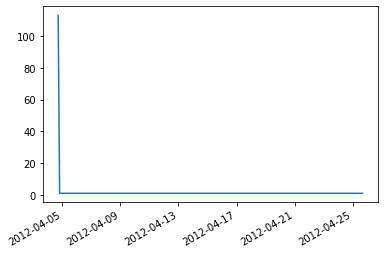

In [110]:
import matplotlib.pyplot as plt

# start from infect_time
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
filtered_df["InfectionTime"] = pd.to_datetime(filtered_df["InfectionTime"],unit='s')

fig, ax = plt.subplots()
newInfectionsList = filtered_df["InfectionTime"].value_counts().sort_index().plot(ax=ax)

# Uncomment to use parameters for changing x-axis and y-axis intervals
# graph.set_xlim(pd.Timestamp('2012-04-15'), pd.Timestamp('2013-01-11'))
# graph.set_ylim(0, 120)

fig.savefig('NewInfections.pdf')

# Line plot cumulative new infections over time

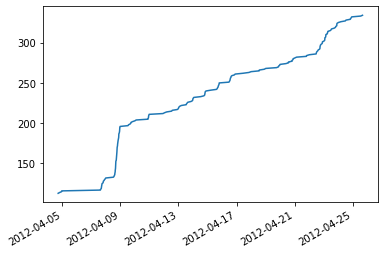

In [111]:
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
filtered_df["InfectionTime"] = pd.to_datetime(filtered_df["InfectionTime"],unit='s')

fig, ax = plt.subplots()

# Construct dataframe of infectionTime to it's frequency
infectionTime_freq_df = pd.DataFrame({"InfectionTime":filtered_df["InfectionTime"].value_counts().index})

cumulatedFrequencyList = filtered_df["InfectionTime"].value_counts().sort_index().cumsum().plot(ax=ax)
fig.savefig('CumulativeInfections.pdf')